# Predicting House Prices with Linear Regression

**Sohaib Mian**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

Linear Regression is utilized to develop a predictive model that predicts sale prices of houses. Linear Regression is a relatively basic model compared to other predictive models but can be effective and computationally cheap.

Different python modules are used to perform exploratory data analysis, data visualization, and data cleaning/preparation. Histogram of sales price is plotted to understand the distribution of the dependent variable. Datatype of each column is checked to separate numerical columns from categorical as well as the null values in each column are visualized and the correlation of each column with Sale Price is determined to ascertain important features.

Multiple different LR models are trained to understand the effect of different numerical variables on the performance of the predictive model. Finally, two models are tested on the testing data to evaluate the performance difference on the training set and the testing set. Th performance metric used throughout the project is R^2. 

The result show that when training data is representative of the testing data then adding more features will improve performance as long as some of the features are correlated with the dependent variable.



[Back to top](#Index)


## 1. Introduction

In this project, predictive modeling will be used to predict Sale prices of houses. One of the major factors in the real estate industry is the sale price of houses that often dictate the outlook of housing market. There are many factors that affect the sale price including external factors and internal factors. External factors such economy, politics, and stock market determine the general outlook of the housing market however the internal factor such as age of house, size, etc. determine the exact sale price of the house. 

Linear Regression (LR) will be utilized in this project to build a predictive model. LR is a relatively basic model compared to other machine learning and deep learning models, however its simplicity and performance often results in an easily built effective benchmark model.

In this project exploratory data analysis will be performed to select useful features from the data set, then data cleaning and preparation will be performed to remove useless data and bring the data in a shape that can be processed by LR. Finally, LR model will be trained, and its performance will be tested on testing data.


[Back to top](#Index)

## 2. The Data



[Back to top](#Index)

### 2.1 Import the Data

In the section below all the modules/Libraries required in the project will be imported:

* Pandas, NumPy, matplotlib, and seaborn will be used in data extraction, exploration, visualization, and cleaning and prep.
* sklearn will be used to split data in training and validation set and to make LR model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
%matplotlib inline

In [2]:
# Extrating raw data as a data frame
df=pd.read_csv('houseSmallData.csv')

In [3]:
# Visaulizing data to see columns
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


[Back to top](#Index)

### 2.2 Data Exploration

In this section, basic data exploration will be done. Datatypes of all columns will be checked, descriptive analysis will be done, and distribution of Sale Price will be visualized.

In [4]:
# Checking datatype and count of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     100 non-null    int64  
 1   Id             100 non-null    int64  
 2   MSSubClass     100 non-null    int64  
 3   MSZoning       100 non-null    object 
 4   LotFrontage    86 non-null     float64
 5   LotArea        100 non-null    int64  
 6   Street         100 non-null    object 
 7   Alley          6 non-null      object 
 8   LotShape       100 non-null    object 
 9   LandContour    100 non-null    object 
 10  Utilities      100 non-null    object 
 11  LotConfig      100 non-null    object 
 12  LandSlope      100 non-null    object 
 13  Neighborhood   100 non-null    object 
 14  Condition1     100 non-null    object 
 15  Condition2     100 non-null    object 
 16  BldgType       100 non-null    object 
 17  HouseStyle     100 non-null    object 
 18  OverallQual

In [5]:
# Descriptive Statistics on numerical variables
df.describe()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
count,100.000000,100.000000,100.000000,86.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.0,0.0,100.000000,100.000000,100.00000,100.000000
mean,49.500000,50.500000,52.000000,71.406977,10115.870000,5.980000,5.50000,1971.410000,1983.920000,121.640000,...,46.900000,24.130000,7.270000,10.160000,0.0,NaN,46.300000,6.330000,2007.90000,173820.660000
std,29.011492,29.011492,42.545282,21.093840,5130.541763,1.530696,0.97959,29.373284,20.967353,213.553982,...,59.743306,60.211019,51.518724,46.908835,0.0,NaN,153.692958,3.048613,1.35959,72236.552886
min,0.000000,1.000000,20.000000,21.000000,1596.000000,3.000000,2.00000,1910.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.00000,40000.000000
25%,24.750000,25.750000,20.000000,60.000000,7643.250000,5.000000,5.00000,1954.750000,1964.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.750000,2007.00000,129362.500000
50%,49.500000,50.500000,45.000000,70.000000,9595.500000,6.000000,5.00000,1970.000000,1994.000000,0.000000,...,30.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.00000,153750.000000
75%,74.250000,75.250000,60.000000,84.000000,11243.250000,7.000000,6.00000,2000.250000,2003.250000,188.500000,...,72.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.00000,207750.000000
max,99.000000,100.000000,190.000000,122.000000,50271.000000,10.000000,8.00000,2009.000000,2009.000000,1115.000000,...,258.000000,272.000000,407.000000,291.000000,0.0,NaN,700.000000,12.000000,2010.00000,438780.000000


C:\Users\stmia\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice'>

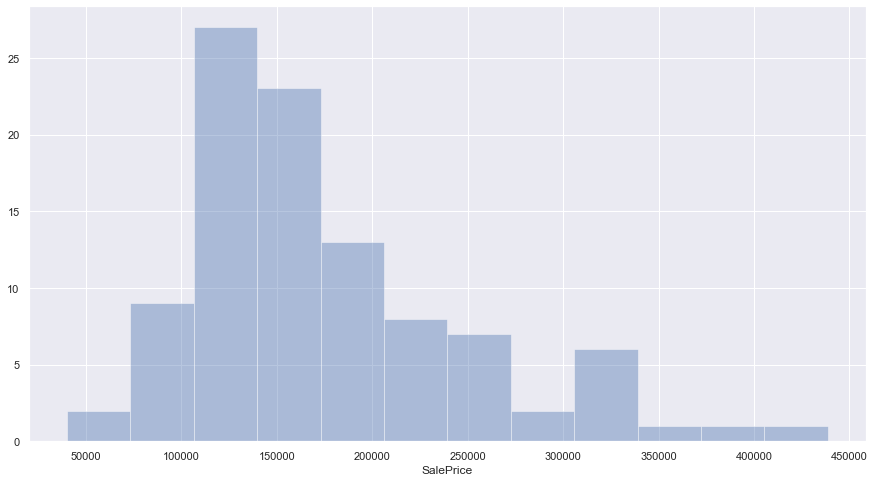

In [6]:
# Plotting histogram to see distribution of Sale Price
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(df['SalePrice'],kde=False)

[Back to top](#Index)

### 2.3 Data Preparation

In this section, data will be divided into train and test sets and the null values in the data frame will be visualized.

In [7]:
"""
Dropping columns Unnamed and ID that have no useful information for the purpose of this project 
and assigning sale price to Y 

"""

X=df.drop(['Unnamed: 0','Id','SalePrice'],axis=1)
y=df[['SalePrice']]

In [8]:
# spliting data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
"""
LR only works with numerical varaibles, to use categorical variables they must be converted into one hot encoding.
Only numerical varibles are extracted.
"""
X_train_num = X_train.select_dtypes(include=[np.number]) 

In [10]:
# sum of all null values in each column
X_train_num.isnull().sum() 

MSSubClass        0
LotFrontage      10
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt       4
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
PoolQC           70
MiscVal           0
MoSold            0
YrSold            0
dtype: int64

Text(0.5, 1.0, 'Null Heatmap')

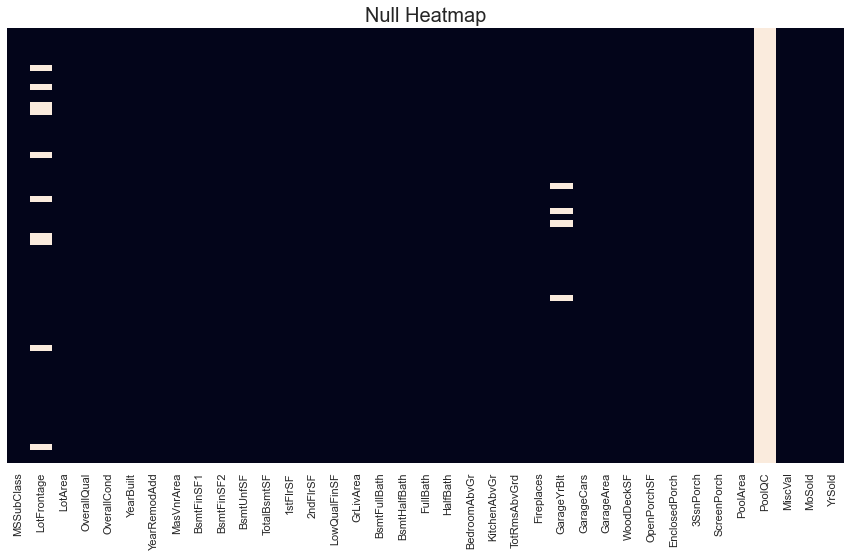

In [11]:
# Visualiztion of null values in a heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(X_train_num.isnull(),cbar=False,yticklabels=False).set_title('Null Heatmap',fontsize = 20)

### Heatmap

Heatmap visualization demonstrates that 3 columns have null values one, PoolQC, have high amount of null and could be dropped. For the other two columns, the decision will be made based on correlation with dependent variable Sale Price.

[Back to top](#Index)

### 2.4 Correlation

Correlation or covariance is a measure of how much two variables vary. Pearson coefficient is normalized covariance and have range between -1 and 1:

* 1 means highly correlated as one increases the other increases proportionally
* 0 means no correlation
* -1 means inversely correlated as one decreases the other increase proportionally

Pearson coefficient will be used firstly to decide the important of columns having null values and then to find variables, features, that are highly correlated with Sales Price. If the variable is highly correlated, Pearson coefficient near 1 or -1, then that variable is important in predicting dependent variable.

In [12]:
# Generating pearson Coefficient for all features
df_corr=X.corr()
df_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.474553,-0.334735,0.051805,-0.107852,-0.050695,0.084539,0.001036,-0.087425,-0.090433,...,-0.105723,0.094580,0.060720,-0.062969,0.060624,NaN,NaN,-0.001483,0.062613,0.031432
LotFrontage,-0.474553,1.000000,0.377787,0.165257,-0.205817,0.248018,0.098120,0.201455,-0.067941,0.124996,...,0.083323,-0.061263,-0.173171,0.160633,0.025977,NaN,NaN,0.046562,0.063138,-0.022476
LotArea,-0.334735,0.377787,1.000000,0.341133,-0.127663,0.188510,0.120216,0.094462,0.356781,-0.082202,...,0.520432,0.085810,-0.100110,0.049825,0.062252,NaN,NaN,0.013759,0.214738,-0.180653
OverallQual,0.051805,0.165257,0.341133,1.000000,-0.154939,0.579579,0.493440,0.530543,0.145068,-0.163460,...,0.336132,0.285284,-0.099157,-0.039126,0.046890,NaN,NaN,-0.075456,0.185418,-0.248507
OverallCond,-0.107852,-0.205817,-0.127663,-0.154939,1.000000,-0.219230,-0.034425,-0.151374,0.054834,0.252310,...,0.083628,-0.076633,-0.079719,-0.072755,0.004177,NaN,NaN,0.085541,-0.245220,0.144101
YearBuilt,-0.050695,0.248018,0.188510,0.579579,-0.219230,1.000000,0.620173,0.376098,0.177758,-0.075364,...,0.273461,0.374108,-0.556239,0.025985,0.039568,NaN,NaN,-0.002547,0.169366,-0.168681
YearRemodAdd,0.084539,0.098120,0.120216,0.493440,-0.034425,0.620173,1.000000,0.267697,0.090585,-0.011104,...,0.197462,0.321306,-0.344259,-0.042658,0.014370,NaN,NaN,-0.120865,0.181353,-0.035363
MasVnrArea,0.001036,0.201455,0.094462,0.530543,-0.151374,0.376098,0.267697,1.000000,0.214430,-0.131987,...,0.230396,0.102244,-0.128313,0.020448,0.033482,NaN,NaN,-0.093912,0.118239,-0.063268
BsmtFinSF1,-0.087425,-0.067941,0.356781,0.145068,0.054834,0.177758,0.090585,0.214430,1.000000,-0.128510,...,0.326576,0.073759,-0.219601,0.043795,0.070759,NaN,NaN,-0.066480,0.027519,-0.121458
BsmtFinSF2,-0.090433,0.124996,-0.082202,-0.163460,0.252310,-0.075364,-0.011104,-0.131987,-0.128510,1.000000,...,0.130609,-0.098736,-0.095025,-0.036736,-0.056384,NaN,NaN,-0.072829,-0.071744,0.210170


Text(0.5, 1.0, 'Correlation_map')

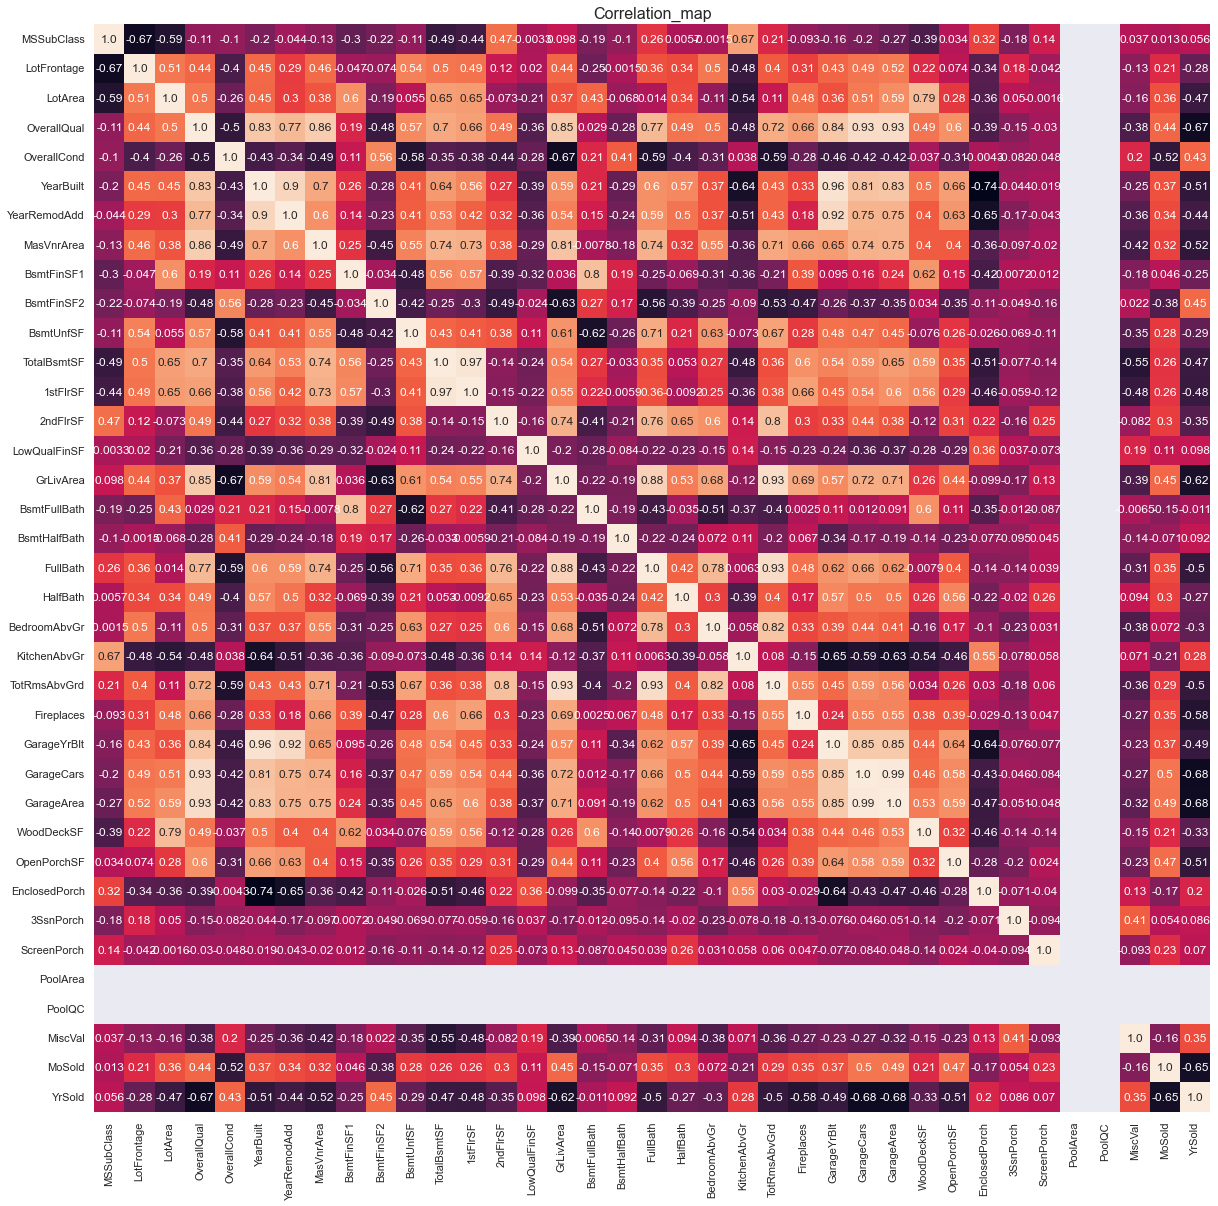

In [13]:
# Visualizing coefficient with heatmap
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(df_corr.corr(),cbar=False,annot=True,fmt=".2").set_title('Correlation_map',fontsize = 16)

In [14]:
# pool area, poolqc have no correlation with saleprice , lot frontage has 0.3 and garage yr blt only 0.6
# Since there are alot of features and null value columns are not correlated, null value columns can be droped
X_train_num = X_train_num.drop(['LotFrontage','GarageYrBlt','PoolQC','PoolArea'],axis=1)

In [15]:
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 11 to 51
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     70 non-null     int64  
 1   LotArea        70 non-null     int64  
 2   OverallQual    70 non-null     int64  
 3   OverallCond    70 non-null     int64  
 4   YearBuilt      70 non-null     int64  
 5   YearRemodAdd   70 non-null     int64  
 6   MasVnrArea     70 non-null     float64
 7   BsmtFinSF1     70 non-null     int64  
 8   BsmtFinSF2     70 non-null     int64  
 9   BsmtUnfSF      70 non-null     int64  
 10  TotalBsmtSF    70 non-null     int64  
 11  1stFlrSF       70 non-null     int64  
 12  2ndFlrSF       70 non-null     int64  
 13  LowQualFinSF   70 non-null     int64  
 14  GrLivArea      70 non-null     int64  
 15  BsmtFullBath   70 non-null     int64  
 16  BsmtHalfBath   70 non-null     int64  
 17  FullBath       70 non-null     int64  
 18  HalfBath   


[Back to top](#Index)

## 3. Project Description

In order to develop an effective model based on Linear Regression the best features must be selected or hyperparameters such as the learning rate must be tuned. In this project the focus is on feature selection, numerical features that are highly correlated with the dependent variable are the ones that must be selected.

Often building an effective predictive model requires an iterative approach where initially a baseline model is built with as little time possible and then the model is improved iteratively. Similar approach is used in this project, first 5 most highly correlated features are selected to build a baseline model. Then the number of features is increased to include following features in order of correlation until maximum R^2 value is reached. R^2 value is between 0 and 1 which measures how much of the variance in the model’s prediction is explained by training data. The closer R^2 to 1 the better.

[Back to top](#Index)

### 3.1 Linear Regression

Linear regression predicts the value of a variable, known as dependent variable (in this project it is Sales Price) based on the value of another variable for single variable linear regression and based on multiple variables for multivariable regression. The variable(s) used to predict the other variable's value is called the independent variable(s).

LR with single variable is given by the formula:

* **y = m1x1 + m2x2 +.....+ b**
* y is independent variable
* m all of them are coefficient for each respective x variable
* x all of them are dependent variables or features
* b is the intercept or the bias term

The target is to find the coefficient, m, and intercept, b, such that dependent variable or feature x gives the value of independent variable y.

There are two approaches to finding coefficient or weights and bias, one is through formulas:

* LaTeX: \begin{equation} m = \frac{n\sum{xy} - \sum{x}\sum{y}}{n\sum{x^2}- (\sum{x})^2} \end{equation}
* LaTeX: \begin{equation} b = \frac{\sum{y}- m\sum{x}}{n} \end{equation}

The second approach is using gradient descent on cost function that contains the loss function which is mean squared error. In this project Scikit learn module is utilized which uses the latter approach.

[Back to top](#Index)

### 3.2 Analysis 

In [16]:
#The function below trains a LR model on data input and then return R^2 as the performance metric
def model(X_tr,Y_tr):
    lr=linear_model.LinearRegression()
    model = lr.fit(X_tr,Y_tr)
    Predictions = model.predict(X_tr)
    return model.score(X_tr,Y_tr)

In [17]:
# The function below return the column list of n-1 columns(features) with highest correlation 
def num_feature_selection(df,n):
    corr=df.corr()
    cols=corr['SalePrice'].sort_values(ascending=False)[1:n].index
    return cols

In [18]:
# first model using first 10 highest correlated features(columns)

#Slice training dataframe to contain only 10 highest correlated features with Saleprice
top_corr=df.drop(['Unnamed: 0','Id','LotFrontage','GarageYrBlt','PoolQC','PoolArea'],axis=1)
X_train_num_10 = X_train_num[num_feature_selection(top_corr,11)]

# training and getting R^2 value
print(model(X_train_num_10,y_train))

0.855691737462693


In [19]:
# second model using first 15 highest correlated features(columns)
X_train_num_15 = X_train_num[num_feature_selection(top_corr,16)]

# training and getting R^2 value
print(model(X_train_num_15,y_train))

0.8815129071066837


In [20]:
# third model using first 20 highest correlated features(columns)
X_train_num_20 = X_train_num[num_feature_selection(top_corr,21)]

# training and getting R^2 value
print(model(X_train_num_20,y_train))

0.8825836131920577


In [21]:
# Fourth model using first 25 highest correlated features(columns)
X_train_num_25 = X_train_num[num_feature_selection(top_corr,26)]

# training and getting R^2 value
print(model(X_train_num_25,y_train))

0.8903793311346316


In [22]:
# Fifth model using first 30 highest correlated features(columns)
X_train_num_30 = X_train_num[num_feature_selection(top_corr,31)]

# training and getting R^2 value
print(model(X_train_num_30,y_train))

0.9120790991670878


In [23]:
# Using all numerical features excpet the ones containting null values

print(model(X_train_num,y_train))

0.9170877324207855


[Back to top](#Index)

### 3.3 Results

Six different models were tested that used different number of features. The performance of the model increased as the number of features increased.

The performance parameter used is R^2 value and the significance of this parameter is explained above in project description section [3. Project Description](#3.-Project-Description).

The performance of the models increase as more variables are added regardless of correlation because adding additional terms will make the model overfit on training data and the performance of the models are only evaluated on training data. That’s why a validation and testing set is required to ensure that the model does not over fit or underfit and optimum number of variables are selected. 

In the Next section a testing set will be used to evaluate two models, one containing all the numerical variables and one contains 20 highest correlated numerical variables.

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Below two models are tested on tested data. The first model contains all numerical features except those containing null values. The second model contains only top 20 correlated features.

The first model performs better than the second one. This result is like the results found on the training set, after all the model containing all the features does not overfit. The reasoning behind is probably because training data comes from similar distribution as the testing data. Therefore, the better the model fits on training data the better it performs on testing data.

In [24]:
#extracting test data to a dataframe
df_test=pd.read_csv('jtest.csv')

In [25]:
#Preparing test features based on the training set
X_test=df_test.drop(['Unnamed: 0','Id','SalePrice','LotFrontage','GarageYrBlt','PoolQC','PoolArea'],axis=1)
X_test_num = X_test.select_dtypes(include=[np.number]) 

In [26]:
#Extracting SalePrice to compare performance later
y_test=df_test['SalePrice']

In [27]:
# training Model 1 on all the trainindata available
# Model 1 contains all numerical features except ones containing null values

X=df.drop(['Unnamed: 0','Id','SalePrice','LotFrontage','GarageYrBlt','PoolQC','PoolArea'],axis=1)
X = X.select_dtypes(include=[np.number]) 

lr=linear_model.LinearRegression()
model_1 = lr.fit(X,y)

In [28]:
# Using model 1 to predict test data
ans=model_1.predict(X_test_num)

In [29]:
#evaluating performace of model_1
model_1.score(X_test_num,y_test)

0.7896147069137684

In [30]:
# training Model 2 on top 20 correlated features
X=df.drop(['Unnamed: 0','Id','SalePrice','LotFrontage','GarageYrBlt','PoolQC','PoolArea'],axis=1)
X = X[num_feature_selection(top_corr,21)]

lr=linear_model.LinearRegression()
model_2 = lr.fit(X,y)

In [31]:
#preparing test data for model_2 that will take the top 20 highest correlated features 
X_test_num_20 = X_test_num[num_feature_selection(top_corr,21)]

In [32]:
# Using model 2 to predict test data
ans=model_2.predict(X_test_num_20)

In [33]:
#evaluating performace of model_2
model_2.score(X_test_num_20,y_test)

0.7442818115487224

[Back to top](#Index)

## Conclusion

LR is a powerful yet simple algorithm that is fast and cheap and useful in creating a benchmark model. What is done in this project is the creation of benchmark model that needs to be improved on. There are number of ways in which this model can be improved:

* More training data can gathered
* Categorical variables can be tested by one hot encoding them
* Hyperparameters such as the learning rate can be tuned
* Other models such as SGD regressor can be used
* Feature selection technique like PCA can be used

This project demonstrates a scientific approach to performing exploratory analysis, visualizing insights, cleaning/preparing data, and building a predictive model.


[Back to top](#Index
)
## References

- Burkov, A (2019). The Hundred Page Machine Learning Book, pp.84–85